![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Deep Learning Fundamentals - Logistic Regression

# Task 1: Introduction

In [1]:
import random
import numpy as np
import warnings
import helpers.plt, helpers.dataset
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
print('Libraries imported')

/Users/conda/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/conda/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/conda/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/conda/opt/anaconda3/envs/te

Libraries imported


# Task 2: Hyperparameters

In [2]:
lr = 0.3
batch_size = 300
iterations = 40

# Task 3: Dataset

In [3]:
(X_train,Y_train),(X_test,Y_test) = helpers.dataset.get_data()

Loading data..
Done.


In [4]:
print('Shape of X_train:', X_train.shape)
#Training set of 12665 samples with 28 by 28 dimension pictures
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (12665, 28, 28)
Shape of Y_train: (12665,)
Shape of X_test: (2115, 28, 28)
Shape of Y_test: (2115,)


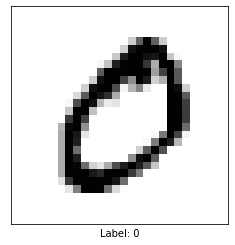

In [5]:
helpers.plt.show_example(X_train[0],Y_train[0])
#Y_train is used for label, X_Train is the image dataset

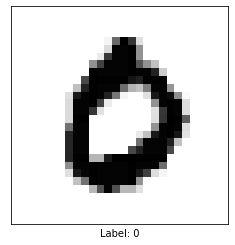

In [6]:
helpers.plt.show_example(X_test[0],Y_train[0])

# Task 4: A Mini Batch of Examples

X_batch shape (1, 784)


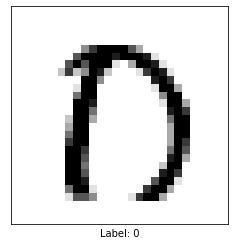

In [7]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_train,Y_train,1)
#took a rabdom picture and converted its 28 by 28 pixel value to a 1D array where each pixel(2D) in the image ends up being the one independent value is a 1D array
print('X_batch shape', X_batch.shape)
helpers.plt.show_example(X_batch[0],Y_batch[0])


X_batch shape (1, 784)


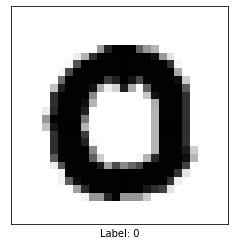

In [8]:
X_batch, Y_batch = helpers.dataset.get_random_batch(X_test,Y_test,1)
#took a rabdom picture and converted its 28 by 28 pixel value to a 1D array where each pixel(2D) in the image ends up being the one independent value is a 1D array
print('X_batch shape', X_batch.shape)
helpers.plt.show_example(X_batch[0],Y_batch[0])

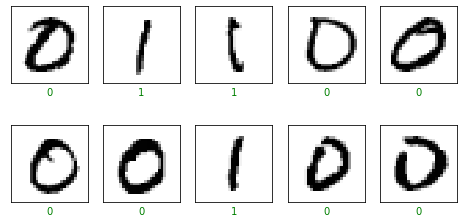

(2115, 28, 28)
(2115,)
(12665, 28, 28)
(12665,)


In [9]:
X_batch,Y_batch = helpers.dataset.get_random_batch(X_train,Y_train,10)
helpers.plt.show_ten_examples(X_batch,Y_batch, Y_batch)
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

# Task 5: Create Model

A logistic model is simply a multi variable linear equation which gives a binary output. The pixel values of our input images are going to be the input features - the independent variables that form the logistic regression equation. And the class label - either 0 or 1 in our case, is the output y.

\begin{equation}
z = b + w_1x_1 + w_2x_2 + ... + w_N * x_N
\end{equation}

\begin{equation}
y = \sigma(z)
\end{equation}

To simplify, we can use vectorized represenation where X is the feature matrix and W is the weight matrix:

\begin{equation}
y = \sigma(W^T.X + b)
\end{equation}

<CENTER><B>R_NOTE  =  We have x as pixels dataset and y as a output. Now we need to find suitable weights and b such that exquation holds true. </B></CENTER>







In [10]:
class LogisticModel:
    def __init__(self, num_features):
        
        self.W = np.reshape(np.random.randn((num_features)), (num_features,1))
        #First we have created a random weights array then reshapes into a coloumn vector.
        self.b = np.zeros((1,1))
        self.num_features = num_features
        self.losses = []
        self.accuracies = []
        
        
    def summary(self):
        print('=================================')
        print('Number of features:', self.num_features)
        print('Shape of weights:', self.W.shape)
        print('Shape of biases:', self.b.shape)
        print('=================================')
 
# Your code here
model = LogisticModel(num_features = 784)
model.summary()

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)


# Task 5: Forward Pass

For a single training example, the loss should be:

\begin{equation}
L(y, \hat{y}) = -(y * log(\hat{y}) + (1 - y) * log(1 - \hat{y}))
\end{equation}

In [31]:
class LogisticModel(LogisticModel):
    def _forward_pass(self, X, Y=None):
        #_ indicates that we can't access it outside the class unlike summary function
        batch_size = X.shape[0]
        
        Z = np.dot(X,self.W) + self.b
        print("w shape" , self.W.shape)
        print("x shape", X.shape)
        print("z shape", Z.shape)
        #W is a coloum matrix therefore we have not taken tanspose
        A = 1./(1. + np.exp(-Z))
        print(A.shape)
        loss = float(1e6)
        # minimizes the loss predictions are going to be more accurate
        if Y is not None:
            loss = -1*np.sum(np.dot(np.transpose(Y),np.log(A)) + \
                            np.matmul(np.transpose(1-Y), np.log(1-A)))
            loss/= batch_size
        return A,loss
        # Your code here


# Task 6: Backward Pass

In [32]:
class LogisticModel(LogisticModel):
    def _backward_pass(self, A, X, Y):
        # Your code here
        batch_size = X.shape[0]
        dZ = A-Y
        dW = np.dot(np.transpose(X), dZ) / batch_size
        db = np.sum(dZ, axis=1, keepdims=True) / batch_size
        return dW,db
        

# Task 7: Update Parameters

In [33]:
class LogisticModel(LogisticModel):
    def _update_params(self, dW, db, lr):
        # Your code here
        self.W -= lr*dW
        self.b -= lr*db

# Task 8: Check Model Performance

In [34]:

class LogisticModel(LogisticModel):
    def predict(self, X, Y=None):
        # Your code here
        A,loss = self._forward_pass(X,Y)
        Y_hat = A > 0.5 
        return np.squeeze(Y_hat),loss
        #squeeze is used to remove to additional dimensions.
    
    def evaluate(self, X, Y):
        # Your code here
        Y_hat,loss = self.predict(X,Y)
        accuracy = np.sum(Y_hat == np.squeeze(Y))/X.shape[0]
        return accuracy,loss
    

In [35]:
model = LogisticModel(784)
model.summary()

X,Y = helpers.dataset.get_random_batch(X_test,Y_test,batch_size)
print("xx",X.shape)
print("yy",Y.shape)
acc,loss = model.evaluate(X,Y)
print(X_test.shape)
#print(Y_test.shape)
print('Untrained model accuracy: {}, loss: {}'.format(acc,loss))

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)
xx (300, 784)
yy (300, 1)
w shape (784, 1)
x shape (300, 784)
z shape (300, 1)
(300, 1)
(2115, 28, 28)
Untrained model accuracy: 0.62, loss: 2.422155062243294


w shape (784, 1)
(300, 784)
(300, 1)
(300, 1)


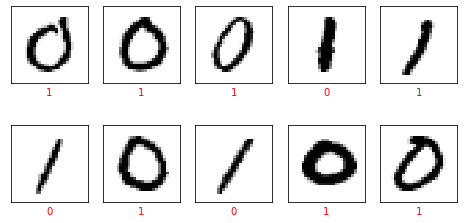

In [16]:
preds,_ = model.predict(X)
helpers.plt.show_ten_examples(X,Y,preds)

# Task 9: Training Loop

In [17]:
class LogisticModel(LogisticModel):
    def train(self, batch_size, get_batch, lr, iterations, X_train, Y_train, X_test, Y_test):
        # Your code here
        print("Training")
        self.accuracies = []
        self.losses=[]
        
        for i in range(iterations):
            X,Y = get_batch(X_train,Y_train, batch_size)
            A,_ = self._forward_pass(X,Y)
            dW,db = self._backward_pass(A,X,Y)
            self._update_params(dW, db, lr)
            
            X,Y = get_batch(X_test,Y_test,batch_size)
            val_acc,val_loss = self.evaluate(X,Y)
            self.accuracies.append(val_acc)
            self.losses.append(val_loss)
            print("Iter: {}, Val Acc: {:.3f}, Val_Loss: {:.3f}")
        print("Training is finished")


# Task 10: Training the Model

In [18]:
model = LogisticModel(784)

X,Y=helpers.dataset.get_random_batch(X_test,Y_test,batch_size)
print("Before Training Performance is: ",model.evaluate(X,Y))

model.train(
            batch_size, 
            helpers.dataset.get_random_batch, 
            lr, 
            iterations, 
            X_train,Y_train, 
            X_test,Y_test
            )
print("After Training Performance is: ", model.evaluate(X,Y))

w shape (784, 1)
(300, 784)
(300, 1)
(300, 1)
Before Training Performance is:  (0.43, 3.4997410351941842)
Training
w shape (784, 1)
(300, 784)
(300, 1)
(300, 1)


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (300,1)

# Task 11: Display the Results